# TITLE:- CUSTOMER SEGMENTATION DATASET 

# importing libraries and reading data

In [4]:
import numpy as np
import pandas as pd
#From pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# removing unstructured datas or invalid datas

In [ ]:
df.drop(["CustomerID"], axis=1, inplace=True)#to remove all unstructured data


# visualizing the dataset 

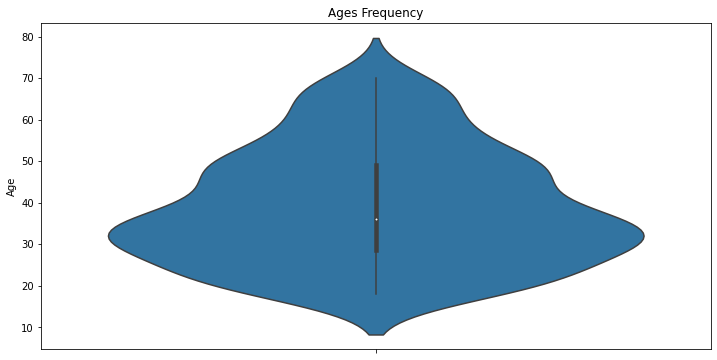

In [9]:
# here we can use various kind of ditribution plot for this categorical distribution dataset like boxplot, violinplot, boxenpot. but i am using violinplot.  
plt.figure(figsize=(12,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

# plotting graphs of spending score against annual income 

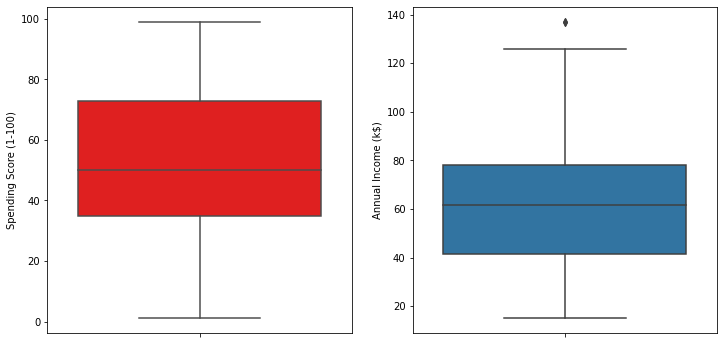

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

plotting graph for gender visualization

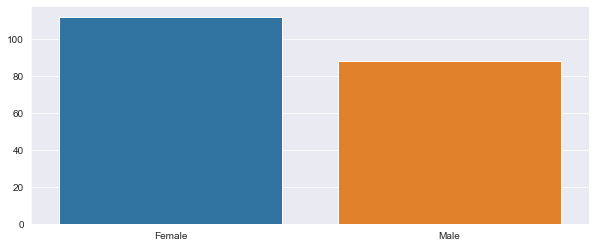

In [7]:
genders=df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# visualization of ages of customers with respect to the number of customers

In [8]:
age18_25=df.Age[(df.Age<=25)&(df.Age>=18)]
age26_35=df.Age[(df.Age<=35)&(df.Age>=26)]
age36_45=df.Age[(df.Age<=45)&(df.Age>=36)]
age46_55=df.Age[(df.Age<=55)&(df.Age>=46)]
age55above=df.Age[(df.Age>=56)]

x=["18-25","26-35","36-45","46-55","55+"]
y=[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]


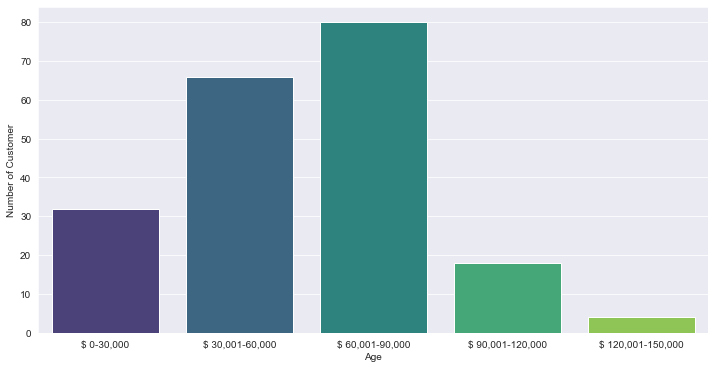

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette="viridis")
plt.title=("number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# visualization of spending score of customers with respect to  no of customers

In [10]:
ss1_20= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss21_40= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss41_60= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss61_80= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss81_100= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]

x=["1-20", "21-40", "41-60", "61-80", "81-100"]
y=[len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]


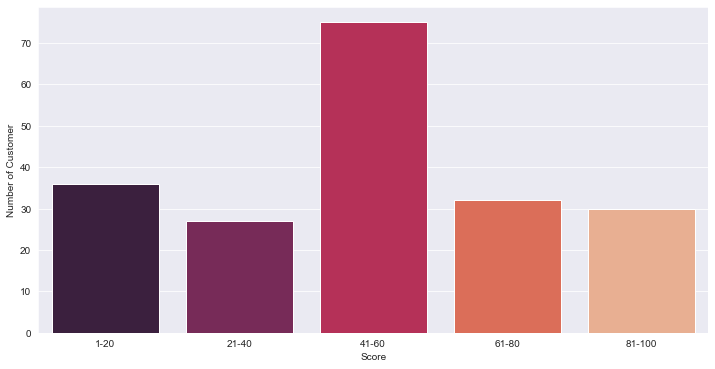

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette="")
plt.title=("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

# visualization of annual income of customers with respect to number of customers

In [12]:
ai0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"] <=30)&(df["Annual Income (k$)"] >=0)]
ai31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"] <=60)&(df["Annual Income (k$)"] >=31)]
ai61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"] <=90)&(df["Annual Income (k$)"] >=61)]
ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"] <=120)&(df["Annual Income (k$)"] >=91)]
ai121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"] <=150)&(df["Annual Income (k$)"] >=121)]

x=["$ 0-30,000", "$ 30,001-60,000", "$ 60,001-90,000", "$ 90,001-120,000", "$ 120,001-150,000"]
y=[len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]


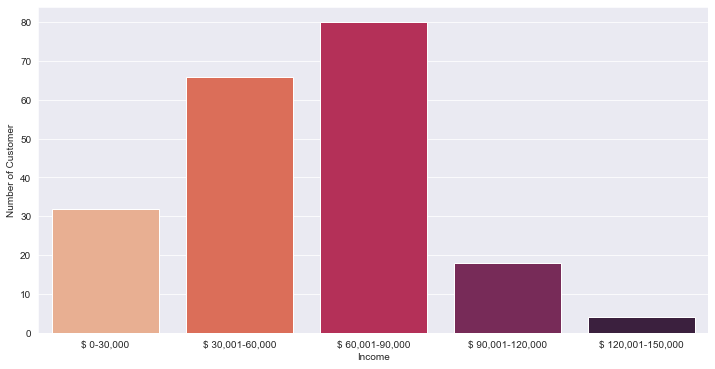

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette="rocket_r")
plt.title=("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# ploting of customers age, spending score and annual income without clustering

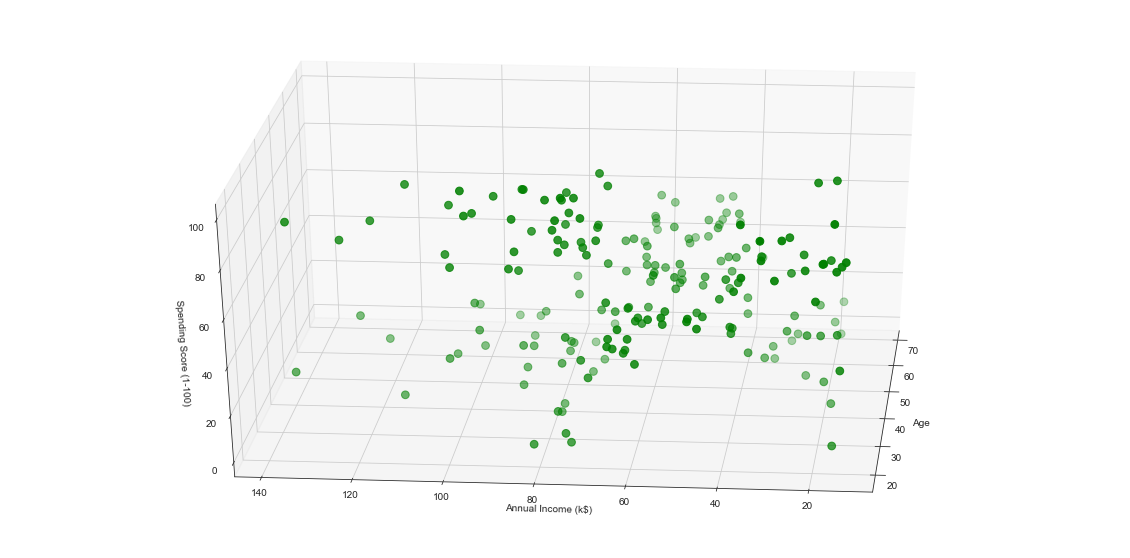

In [7]:
# We will use Age, Annual Income and Spending Score for clustering customers. Let's look how our plot is seen without clustering.

from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], color='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# using elbow method to find k value

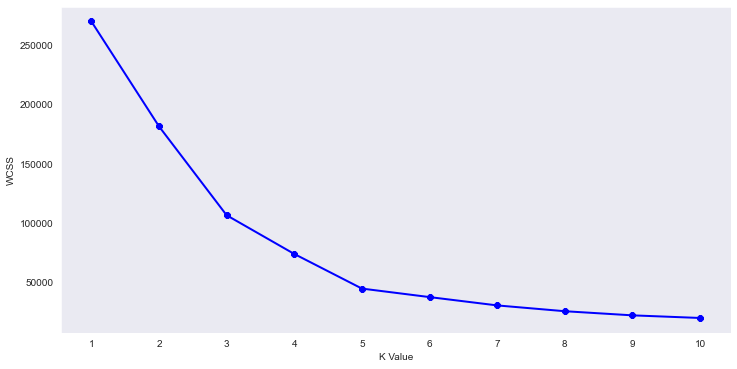

In [26]:
# using elbow method to find the k value
from sklearn.cluster import KMeans

wcss=[]
X=df.iloc[:,[3, 4]].values
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

plotting each labels differently using different colours 

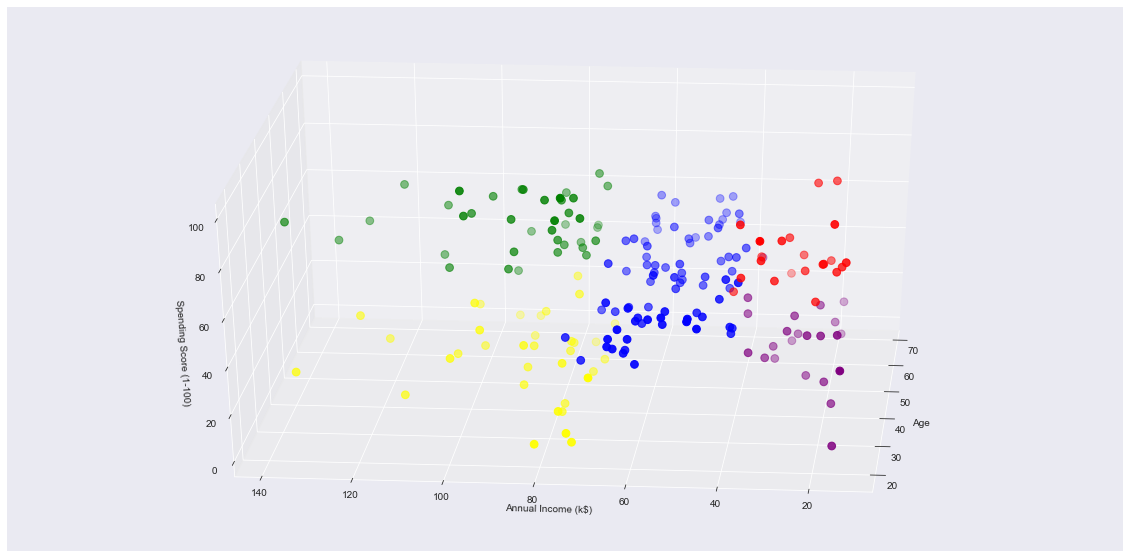

In [29]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(X)

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# finally visualising th final cluster using k_means clustering

In [18]:
#visualising tthe clusters
kmeans= KMeans(n_clusters=5, init="k-means++", random_state=42)
y_means=kmeans.fit_predict(X)


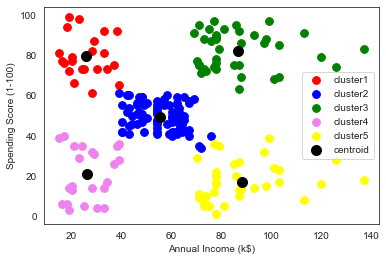

In [23]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=60, color="red", label="cluster1")
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=60, color="blue", label="cluster2")
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=60, color="green", label="cluster3")
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s=60, color="violet", label="cluster4")
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s=60, color='yellow', label="cluster5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='black', label="centroid")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()